# **LAB 3 - PART 3 Classification**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,SVC     # svr is for regression and svc is for classification
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.3f}'.format

#### **Read csv file**

In [2]:
### START CODE HERE ###
df = pd.read_csv('./Coffee-modified.csv')
### END CODE HERE ###

Select only `['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`

In [3]:
### START CODE HERE ###
df = df[[ 'Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters' ]]
### END CODE HERE ###
df

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,"2,075.000"
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,"2,075.000"
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,"1,700.000"
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,"2,000.000"
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,"2,075.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,"1,100.000"
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,"1,417.320"


**Drop NA**


In [4]:
### START CODE HERE ###
df.dropna(inplace=True)
### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,"1,003.000","1,003.000","1,003.000","1,003.000","1,003.000","1,003.000","1,003.000","1,003.000","1,003.000","1,003.000"
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,"1,816.792"
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,"9,112.473"
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,"1,100.000"
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,"1,310.640"
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,"1,600.000"
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,"190,164.000"


Let's `Y` be  `Total.Cup.Points` and X be the rest except in  `Y`.

In [5]:
### START CODE HERE ###
Y = df[['Total.Cup.Points']]
X = df.drop(columns=['Total.Cup.Points'])

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>

In [6]:
print(X.columns)
print(Y.columns)

Index(['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture',
       'altitude_mean_meters'],
      dtype='object')
Index(['Total.Cup.Points'], dtype='object')


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`


In [7]:
### START CODE HERE ###
rating_pctile = [Y["Total.Cup.Points"].quantile(0.75), Y["Total.Cup.Points"].quantile(0.9)]
print(rating_pctile)
### END CODE HERE ###
Y.loc[Y["Total.Cup.Points"] < rating_pctile[0], "Bean_grade"] = 1
Y.loc[(Y["Total.Cup.Points"] >= rating_pctile[0]) & (Y["Total.Cup.Points"] < rating_pctile[1]), "Bean_grade"] = 2
Y.loc[Y["Total.Cup.Points"] >= rating_pctile[1], "Bean_grade"] = 3
Y.describe()

[83.58, 84.58]


/tmp/ipykernel_108205/352278101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y["Total.Cup.Points"] < rating_pctile[0], "Bean_grade"] = 1


,Total.Cup.Points,Bean_grade
count,"1,003.000","1,003.000"
mean,82.127,1.361
std,2.632,0.664
min,59.830,1.000
25%,81.170,1.000
50%,82.420,1.000
75%,83.580,2.000
max,90.580,3.000


**Plot Bar graph that show count of each `Bean_grade`.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

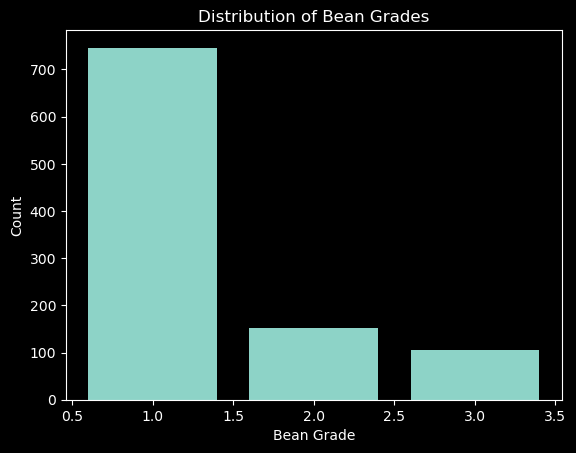

</details>

<Axes: xlabel='Bean_grade'>

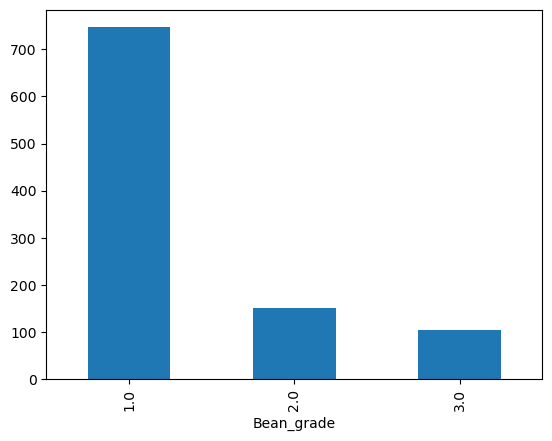

In [8]:
### START CODE HERE ###
Y["Bean_grade"].value_counts().plot(kind='bar')

### END CODE HERE ###

**Standardize X's numeric data**

In [9]:
### START CODE HERE ###
scaler = StandardScaler()
numeric_features = X.select_dtypes(include=[np.number]).columns
X[numeric_features] = scaler.fit_transform(X[numeric_features])
X

### END CODE HERE ###

,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,Arabica,Ethiopia,Washed / Wet,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,Arabica,Ethiopia,Natural / Dry,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,Arabica,Ethiopia,Washed / Wet,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,Arabica,Ethiopia,Natural / Dry,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Arabica,Honduras,Washed / Wet,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,Arabica,Mexico,Washed / Wet,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,Arabica,Haiti,Natural / Dry,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,Arabica,Nicaragua,Other,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**Drop the columns that have correlation more than 0.8.**

DROPPED {'Flavor'}


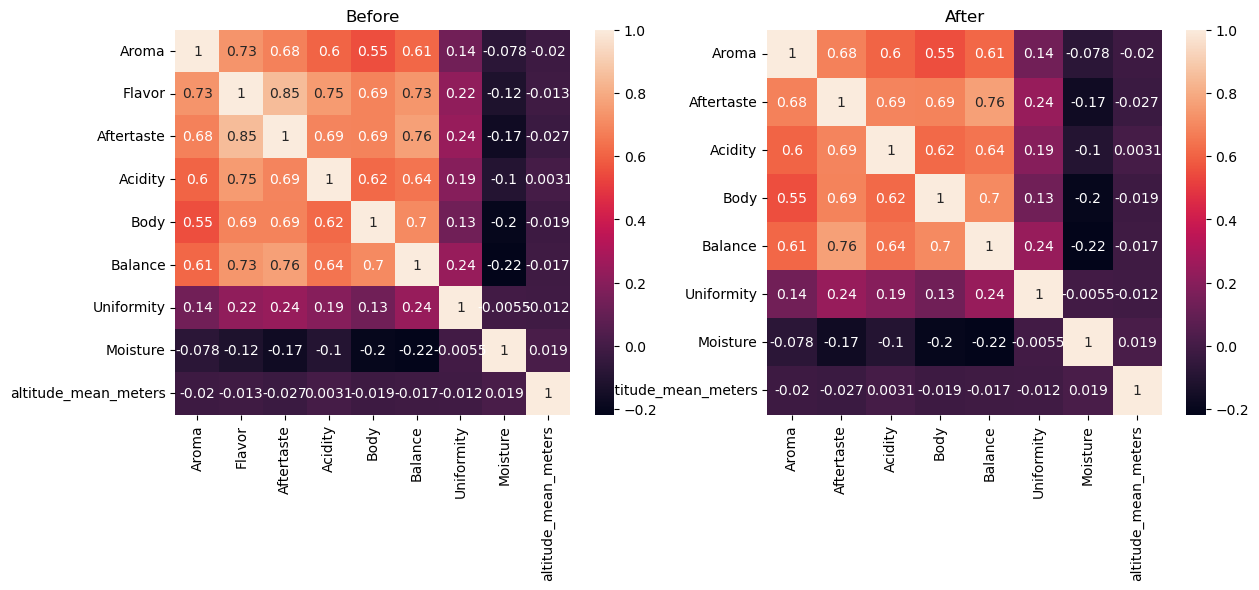

In [10]:
### START CODE HERE ###
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))  # Create a figure with two subplots
X_numeric = X[numeric_features]
correlation_matrix= X_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, ax=axs[0])  # Plot heatmap on the first subplot
axs[0].set_title('Before')  # Set title for the first subplot

columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[j]
            columns_to_drop.add(colname)
# Dropping the columns from the DataFrame
X_numeric = X_numeric.drop(columns=columns_to_drop)
correlation_matrix_after = X_numeric.corr()
sns.heatmap(correlation_matrix_after, annot=True, ax=axs[1])  # Plot heatmap on the second subplot
axs[1].set_title('After')  # Set title for the second subplot
print("DROPPED" , columns_to_drop)
X = X.drop(columns=columns_to_drop)
### END CODE HERE ###

**One hot encode non-numeric columns**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>

In [11]:
### START CODE HERE ###
X = pd.get_dummies(X)
### END CODE HERE ###
X

,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters,Species_Arabica,Country.of.Origin_Brazil,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.660,3.862,3.978,3.651,2.703,0.292,0.576,0.028,True,False,...,False,False,False,False,False,False,False,False,False,True
1,3.926,3.351,3.425,3.358,2.703,0.292,0.576,0.028,True,False,...,False,False,False,False,False,False,False,False,False,True
3,2.000,3.110,2.905,3.651,2.204,0.292,0.346,0.020,True,False,...,False,False,False,False,False,True,False,False,False,False
4,2.266,2.599,3.165,3.358,2.439,0.292,0.576,0.028,True,False,...,False,False,False,False,False,False,False,False,False,True
9,1.702,3.351,3.165,0.608,2.703,0.292,0.115,0.001,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040,True,False,...,False,False,False,False,False,False,False,False,False,True
1306,-1.618,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101,True,False,...,False,False,False,False,False,False,False,False,False,True
1307,-2.714,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161,True,False,...,False,False,False,False,False,True,False,False,False,False
1308,-1.054,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079,True,False,...,False,False,False,False,False,False,True,False,False,False


**Split the training set into 70% for training and the remaining 30% for the test set.**

In [12]:
### START CODE HERE ###
X_train, X_test, Y_train, Y_test = train_test_split(X, Y["Bean_grade"].astype(int), test_size=0.3)
### START CODE HERE ###


### **Grid Search**
**Initialize models and Search Space**
- `Support Vector Machine`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [13]:
### START CODE HERE ###

# 10 missing from gamma
grid_search = { "kernel": ['linear','rbf','poly' ] ,  'C': [ 0.1,1,100] , 'gamma': [ 0.01, 0.1,10], 'degree': [2,3 ]}
svc = SVC()

grid_cv_svc = model_selection.GridSearchCV(svc, grid_search, cv=5,verbose=2, n_jobs=-1)
grid_cv_svc.fit(X_train, Y_train)
### END CODE HERE ###

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[CV] END .........C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, degree=2, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, de

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100], 'degree': [2, 3],
                         'gamma': [0.01, 0.1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [14]:
import operator
## START CODE HERE ###

def show ( cv,sortkey='mean_test_score'):
    # Extract relevant data from cv results
    results = [
        {"mean_test_score": cv.cv_results_['mean_test_score'][i],
         "std_test_score": cv.cv_results_['std_test_score'][i],
         "params": cv.cv_results_['params'][i]}
        for i in range(len(cv.cv_results_['params']))
    ]

    # Sort results by mean test score in descending order
    sorted_results = sorted(results, key=operator.itemgetter(sortkey), reverse=True)

    # Print the best parameters and score
    print("Best parameters for SVM: ", cv.best_params_)
    print("Best score for SVM: ", cv.best_score_)

    # Print sorted results with formatted output
    for result in sorted_results:
        mean = result["mean_test_score"]
        std = result["std_test_score"]
        param = result["params"]
        print("mean:%0.3f std:%0.3f for %r" % (mean, std, param))
show(grid_cv_svc)

### END CODE HERE ###

Best parameters for SVM:  {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVM:  0.9288044579533942
mean:0.929 std:0.016 for {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
mean:0.929 std:0.016 for {'C': 100, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
mean:0.926 std:0.015 for {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
mean:0.926 std:0.015 for {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
mean:0.926 std:0.015 for {'C': 1, 'degree': 2, 'gamma': 10, 'kernel': 'linear'}
mean:0.926 std:0.015 for {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear'}
mean:0.926 std:0.015 for {'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
mean:0.926 std:0.015 for {'C': 1, 'degree': 3, 'gamma': 10, 'kernel': 'linear'}
mean:0.926 std:0.014 for {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
mean:0.926 std:0.014 for {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
mean:0.926 std:0.014 for {'C': 100, 'degree': 2, 'gamma': 10, '

Utilize the best parameters obtained from grid search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, create a function to calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[216   7   1]
 [  9  33   4]
 [  0   6  25]]
   Precision  Recall  F1-Score  Support
0      0.960   0.964     0.962      224
1      0.717   0.717     0.717       46
2      0.833   0.806     0.820       31

Accuracy:  0.9102990033222591
```

</details>

In [15]:
def report(cv):
    y_pred = cv.predict(X_test)
    print('Confusion Matrix: \n', metrics.confusion_matrix(Y_test, y_pred))
    print('classification_report: \n', metrics.classification_report(Y_test, y_pred))
    print('Accuracy: ', metrics.accuracy_score(Y_test, y_pred))
report(grid_cv_svc)

Confusion Matrix: 
 [[211   7   2]
 [ 12  31   6]
 [  0   4  28]]
classification_report: 
               precision    recall  f1-score   support

           1       0.95      0.96      0.95       220
           2       0.74      0.63      0.68        49
           3       0.78      0.88      0.82        32

    accuracy                           0.90       301
   macro avg       0.82      0.82      0.82       301
weighted avg       0.89      0.90      0.89       301

Accuracy:  0.8970099667774086


**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
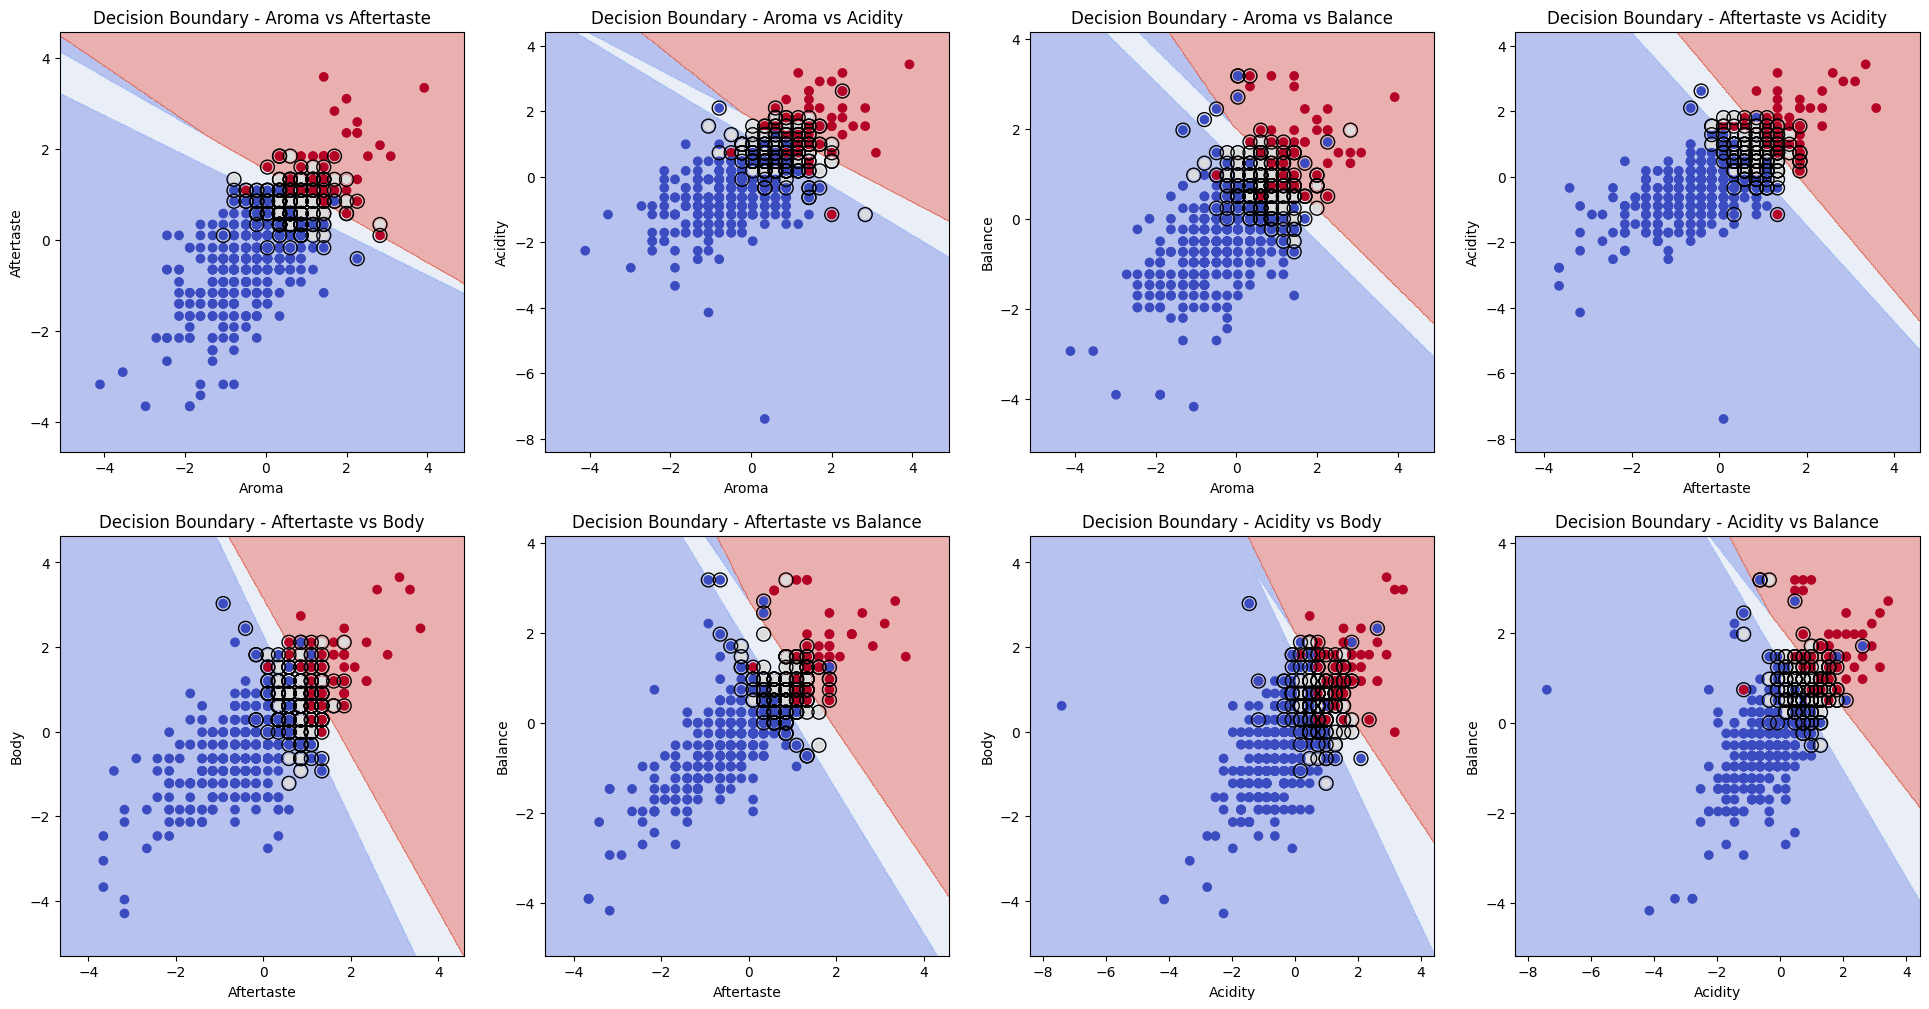
</details>

In [16]:
mask = (correlation_matrix_after.abs() > 0.5) & (correlation_matrix_after.abs() < 0.8)
valid_pairs = set([(column1, column2) for column1 in mask.columns for column2 in mask.index if mask.loc[column1, column2]])
valid_pairs

{('Acidity', 'Aftertaste'),
 ('Acidity', 'Aroma'),
 ('Acidity', 'Balance'),
 ('Acidity', 'Body'),
 ('Aftertaste', 'Acidity'),
 ('Aftertaste', 'Aroma'),
 ('Aftertaste', 'Balance'),
 ('Aftertaste', 'Body'),
 ('Aroma', 'Acidity'),
 ('Aroma', 'Aftertaste'),
 ('Aroma', 'Balance'),
 ('Aroma', 'Body'),
 ('Balance', 'Acidity'),
 ('Balance', 'Aftertaste'),
 ('Balance', 'Aroma'),
 ('Balance', 'Body'),
 ('Body', 'Acidity'),
 ('Body', 'Aftertaste'),
 ('Body', 'Aroma'),
 ('Body', 'Balance')}

In [17]:
### START CODE HERE ###
# Selecting 4 pairs of features
def plot_bound(cv):
    feature_pairs = list( valid_pairs )[0:4]
    plt.figure(figsize=(16, 12))

    for i, pair in enumerate(feature_pairs, start=1):
        plt.subplot(2, 2, i)
        X_train_pair = X_train.loc[:, pair]

        # Plotting the decision boundary
        x_min, x_max = X_train_pair[ pair[0]].min() - 1, X_train_pair[ pair[0]].max() + 1
        y_min, y_max = X_train_pair[ pair[1]].min() - 1, X_train_pair[ pair[1]].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        bestparam = cv.best_params_
        svc = SVC(kernel=bestparam['kernel'], C=bestparam['C'], gamma=bestparam['gamma'], degree=bestparam['degree'])
        svc.fit(X_train_pair.values, Y_train)
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)

        # Plotting the training points
        plt.scatter(X_train[pair[0]], X_train[pair[1]], c=Y_train, cmap=plt.cm.Paired, edgecolors='k')
        plt.xlabel('Feature {}'.format(pair[0]))
        plt.ylabel('Feature {}'.format(pair[1]))
        plt.title('Pair of Features {} vs {}'.format(pair[0], pair[1]))

    plt.show()


### END CODE HERE ####

### **Random Search**
**Initialize models and Search Space**
- `Support Vector Machine`

Utilize the search space as provided by the Lab direction.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 37.575, 75.05, 112.525, 150.0], 'gamma': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'degree': [2, 3]}`

</details>

In [18]:
### START CODE HERE ###
from sklearn.model_selection import StratifiedKFold

rand_search = { "kernel": ['linear','rbf','poly' ] ,  'C': [ 0.1,1,10,40,80] , 'gamma': [ 0.01, 0.1,1,5, 10], 'degree': [2,3 ]}

rand_cv_svc = model_selection.RandomizedSearchCV(
    SVC(),
    rand_search,
    scoring='accuracy',
    n_iter=30,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)
rand_cv_svc.fit(X_train, Y_train)
### END CODE HERE ###

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(), n_iter=30,
                   param_distributions={'C': [0.1, 1, 10, 40, 80],
                                        'degree': [2, 3],
                                        'gamma': [0.01, 0.1, 1, 5, 10],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [19]:
### START CODE HERE ###
show(rand_cv_svc)
### END CODE HERE ###

Best parameters for SVM:  {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 10}
Best score for SVM:  0.9216717325227963
mean:0.922 std:0.032 for {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 10}
mean:0.922 std:0.032 for {'kernel': 'linear', 'gamma': 5, 'degree': 2, 'C': 10}
mean:0.919 std:0.027 for {'kernel': 'linear', 'gamma': 10, 'degree': 2, 'C': 40}
mean:0.919 std:0.027 for {'kernel': 'linear', 'gamma': 0.1, 'degree': 3, 'C': 40}
mean:0.919 std:0.029 for {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 1}
mean:0.919 std:0.029 for {'kernel': 'linear', 'gamma': 0.01, 'degree': 2, 'C': 1}
mean:0.919 std:0.029 for {'kernel': 'linear', 'gamma': 1, 'degree': 3, 'C': 1}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 1, 'degree': 2, 'C': 80}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'C': 80}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 5, 'degree': 3, 'C': 80}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 0.1, 'degr

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[217   6   1]
 [ 11   32   3]
 [  0    5  26]]
   Precision  Recall  F1-Score  Support
0      0.952   0.969     0.960      224
1      0.744   0.696     0.719       46
2      0.867   0.839     0.852       31

Accuracy:  0.9136212624584718
```

</details>


In [20]:
### START CODE HERE ###
report(rand_cv_svc)
### START CODE HERE ###

Confusion Matrix: 
 [[208   7   5]
 [  9  34   6]
 [  0   4  28]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.95      0.95       220
           2       0.76      0.69      0.72        49
           3       0.72      0.88      0.79        32

    accuracy                           0.90       301
   macro avg       0.81      0.84      0.82       301
weighted avg       0.90      0.90      0.90       301

Accuracy:  0.8970099667774086


**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
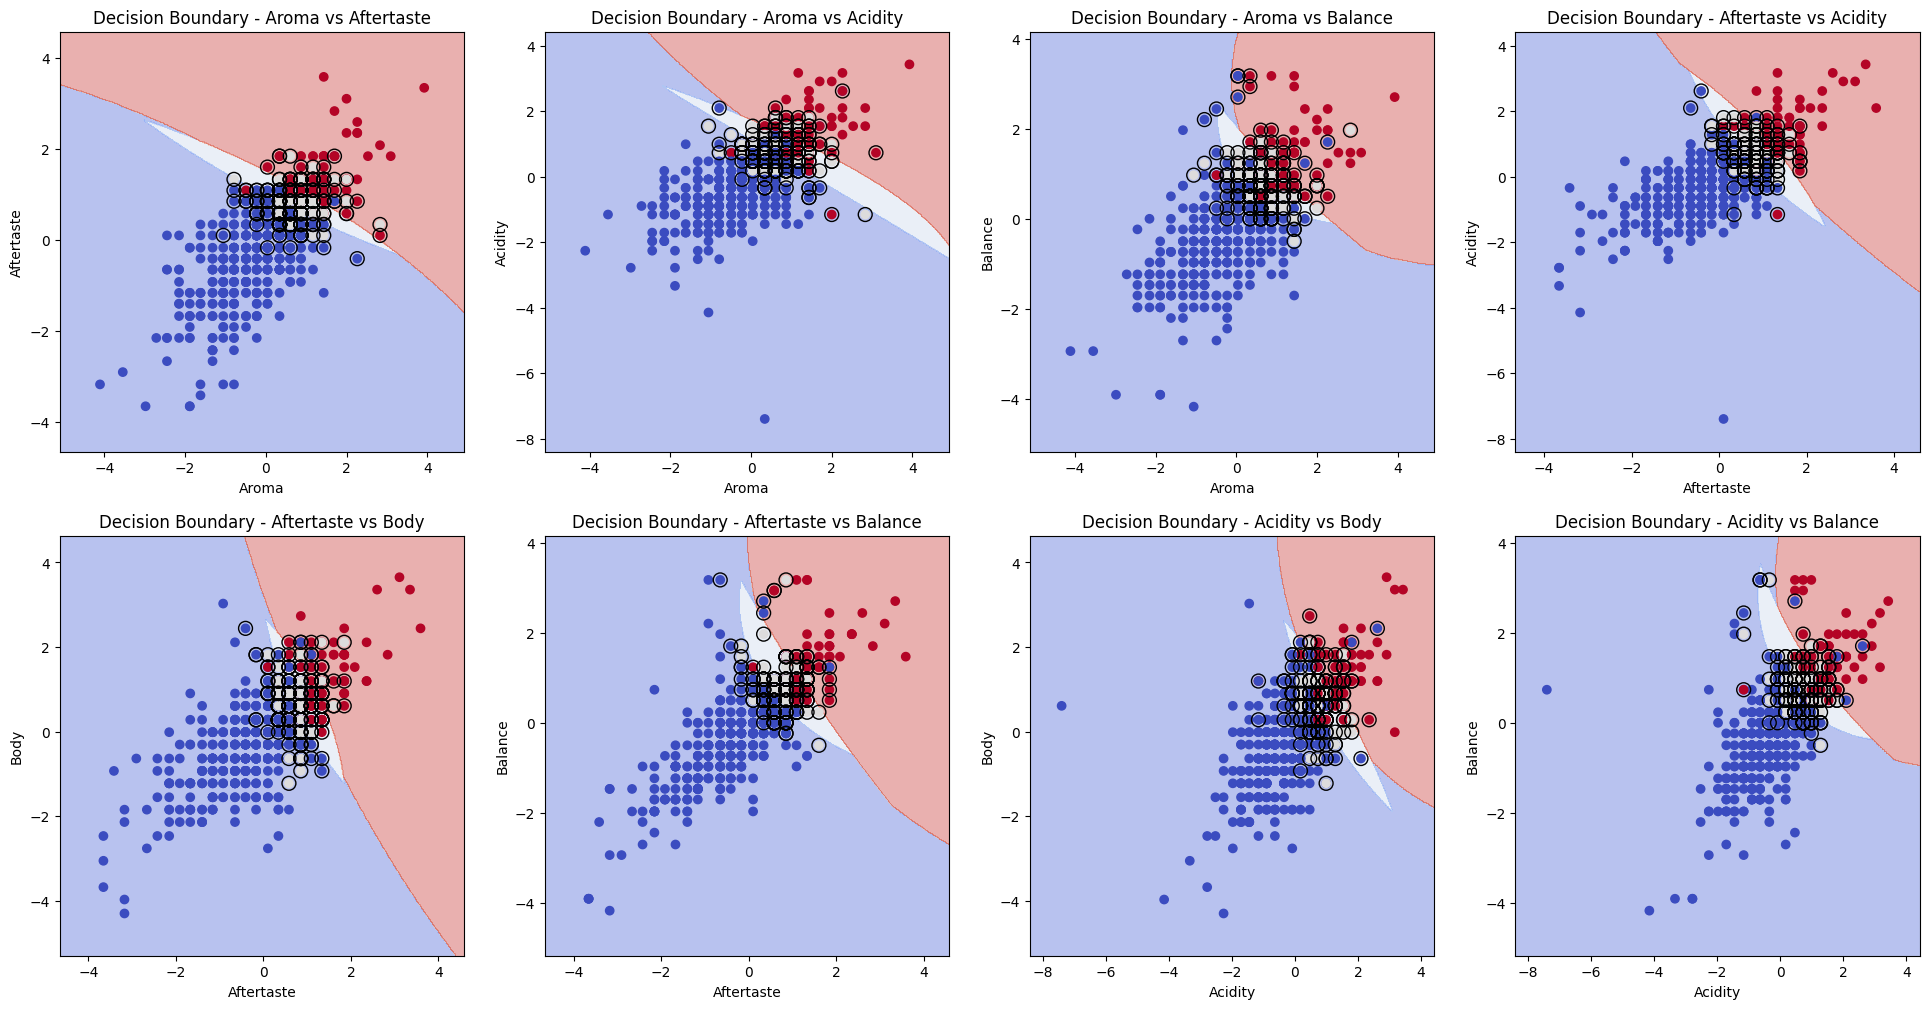
</details>

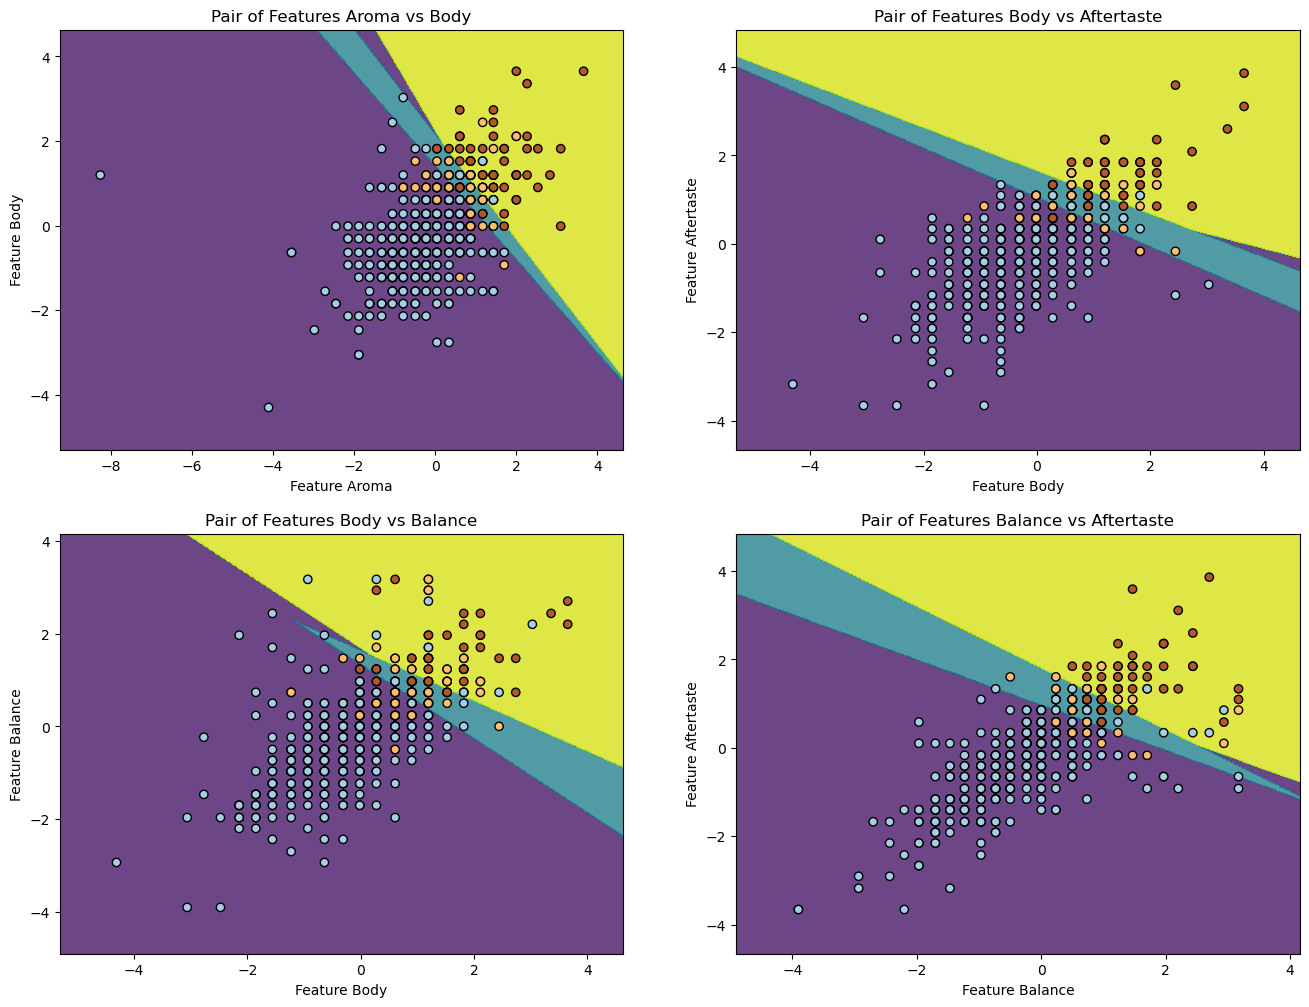

In [21]:
### START CODE HERE ###
plot_bound(rand_cv_svc)
### START CODE HERE ###

In [22]:
show(rand_cv_svc, sortkey="std_test_score")

Best parameters for SVM:  {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 10}
Best score for SVM:  0.9216717325227963
mean:0.812 std:0.040 for {'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'C': 10}
mean:0.811 std:0.038 for {'kernel': 'rbf', 'gamma': 1, 'degree': 2, 'C': 40}
mean:0.811 std:0.038 for {'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'C': 40}
mean:0.922 std:0.032 for {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 10}
mean:0.922 std:0.032 for {'kernel': 'linear', 'gamma': 5, 'degree': 2, 'C': 10}
mean:0.883 std:0.031 for {'kernel': 'poly', 'gamma': 5, 'degree': 2, 'C': 0.1}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 1, 'degree': 2, 'C': 80}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'C': 80}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 5, 'degree': 3, 'C': 80}
mean:0.909 std:0.031 for {'kernel': 'linear', 'gamma': 0.1, 'degree': 3, 'C': 80}
mean:0.919 std:0.029 for {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 

In [23]:
show(grid_cv_svc, sortkey="std_test_score")

Best parameters for SVM:  {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVM:  0.9288044579533942
mean:0.896 std:0.020 for {'C': 0.1, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}
mean:0.896 std:0.020 for {'C': 1, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}
mean:0.896 std:0.020 for {'C': 100, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}
mean:0.878 std:0.020 for {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
mean:0.878 std:0.020 for {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
mean:0.905 std:0.018 for {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
mean:0.905 std:0.018 for {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
mean:0.906 std:0.016 for {'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
mean:0.929 std:0.016 for {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
mean:0.929 std:0.016 for {'C': 100, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
mean:0.788 std:0.015 for {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'

### Question
1. The dropped feature columns with corr > 0.8 are correlated to which columns?
2. Compare the top 3 best model parameters from gridsearchCV() and randomizedsearchcv(), are they different? Explain.
3. Choose a combination of model parameters that yield the highest standard deviation in cross-validation scores. Enumerate the scores for each cross-validation iteration and provide an explanation for the potential reasons behind the observed variations.
4. Show correlation values between Y output and each X input and how the top 2 highest and 2 lowest correlation of the pair Y and each X related to the decision boundary of 3 class output?

## Answers
1. Flavour and AfterTest
2. Grid search found better parameters
```
Grid search
mean:0.919 std:0.027 for {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
mean:0.919 std:0.027 for {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
mean:0.919 std:0.027 for {'C': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'linear'}
```

```
Random search cv
mean:0.907 std:0.015 for {'kernel': 'linear', 'gamma': 0.01, 'degree': 2, 'C': 0.1}
mean:0.907 std:0.015 for {'kernel': 'linear', 'gamma': 5, 'degree': 2, 'C': 0.1}
mean:0.907 std:0.015 for {'kernel': 'linear', 'gamma': 0.1, 'degree': 3, 'C': 0.1}
```
3. mean:0.878 std:0.031 for {'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 1}

### 4. Correlation

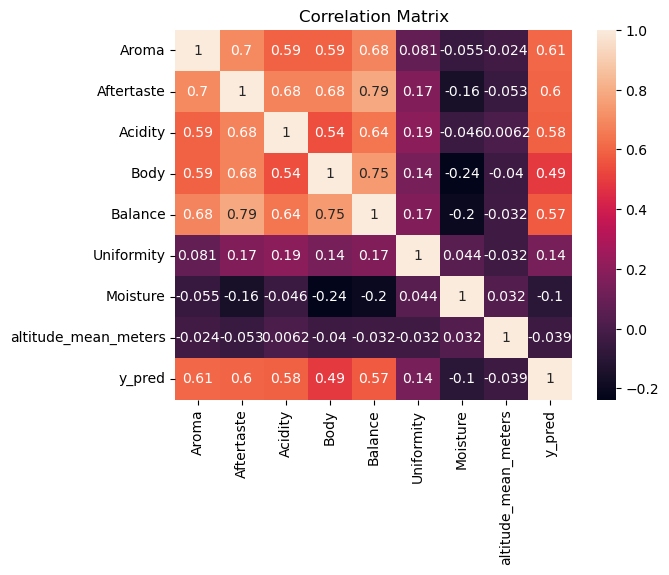

In [25]:
y_pred = grid_cv_svc.predict(X_test)

numeric_features = X_test.select_dtypes(include=[np.number]).columns
compareDf = pd.concat([X_test[numeric_features].reset_index(drop=True), pd.DataFrame( { "y_pred":y_pred } )], axis=1)

correlation_matrix = compareDf.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


4. top is : Aroma , Aftertaste 
    worst is : Moisture altitude mean meters

ตัวที่มี corr สูงมีความเกี่ยวข้อง